In [1]:
import matplotlib.pyplot as plt
import dueling_ddqn
import gym 

import numpy as np 

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

# setup
# parameters
REPLAYMEMORY_SIZE = 100000
TARGETUPDATERATE = 10000
CHECKPOINT = 10000
BATCHSIZE = 32
WARMUPSTEPS = 1000
TRAINSTEPS = 1
GAMMA = 0.99
RENDER = True

# agent
env = gym.make('Breakout-ram-v0')
#versions = ['dqn-0.2.1', 'dqn-0.2.2', 'dqn-0.2.3', 'ddqn-0.2', 'ddqn-0.2.1']
#versions = ['ddqn-0.2.1', 'ddqn-0.2.2', 'ddqn-0.2.3', 'ddqn-0.2.4', 'ddqn-0.2.5', 'ddqn-0.2.6', 'ddqn-0.2.7']
versions = ['dueling_ddqn_final']
agent = dueling_ddqn.brain(env, versions[0], REPLAYMEMORY_SIZE, TARGETUPDATERATE, BATCHSIZE, WARMUPSTEPS, TRAINSTEPS, CHECKPOINT, GAMMA, RENDER)
agent.load_experiment('2020-05-20')


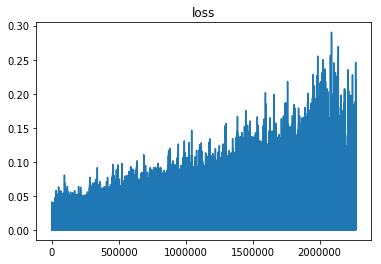

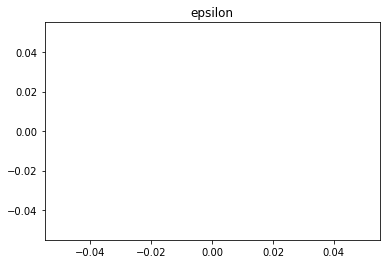

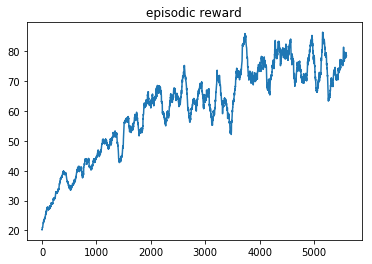

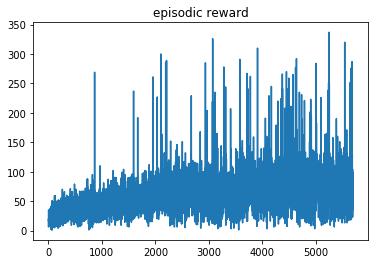

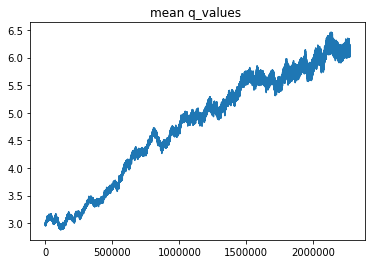

In [2]:
# PLOTS
plt.plot(range(len(agent.logger['loss'])), agent.logger['loss'])
#plt.plot(range(len(agent.logger['epsilon'])), agent.logger['epsilon'])
plt.title('loss')
plt.savefig('data/graphs/loss-{}.PNG'.format(agent.logger['name']))
plt.show()

plt.plot(range(len(agent.logger['epsilon'])), agent.logger['epsilon'])
plt.title('epsilon')
plt.show()

mean_rewards = running_mean(agent.logger['episodic_rewards'], 100)
plt.plot(range(len(mean_rewards)), mean_rewards)
plt.title('episodic reward')
plt.savefig('data/graphs/episodic-rewards-avg-{}.PNG'.format(agent.logger['name']))
plt.show()

plt.plot(range(len(agent.logger['episodic_rewards'])), agent.logger['episodic_rewards'])
plt.title('episodic reward')
plt.savefig('data/graphs/episodic-rewards-{}.PNG'.format(agent.logger['name']))
plt.show()

mean_q_values = running_mean(agent.logger['q_values'], 100)
plt.plot(range(len(mean_q_values)), mean_q_values)
plt.savefig('data/graphs/q_values-{}.PNG'.format(agent.logger['name']))
plt.title('mean q_values ')
plt.show()

In [3]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [3]:
from collections import deque

EPISODES = 10
agent.epsilon = 0.01
for e in range(EPISODES):
    state = env.reset()
    steps = 0
    terminal = False
    episodic_reward = 0
    past_30_actions = deque(maxlen=30)
    env.step(1)
    lives = 5
    while not terminal:
        steps += 1
        #env.render()
        action = agent.get_action(state)
        nextState, reward, terminal, info = env.step(action)
        
        if info['ale.lives'] < lives:
            env.step(1)
            lives = info['ale.lives']
            
        #agent.set_perception(state, action, reward, nextState, terminal)
        state = nextState
        episodic_reward += reward
    env.close()
    print('episode {} / {} episodic reward {} epsilon {}'.format(e+1, EPISODES, episodic_reward, agent.epsilon))
    agent.logger['episodic_rewards'].append(steps)
print('end of test')

episode 1 / 10 episodic reward 31.0 epsilon 0.01
episode 2 / 10 episodic reward 31.0 epsilon 0.01
episode 3 / 10 episodic reward 20.0 epsilon 0.01
episode 4 / 10 episodic reward 17.0 epsilon 0.01
episode 5 / 10 episodic reward 14.0 epsilon 0.01
episode 6 / 10 episodic reward 30.0 epsilon 0.01
episode 7 / 10 episodic reward 12.0 epsilon 0.01
episode 8 / 10 episodic reward 16.0 epsilon 0.01
episode 9 / 10 episodic reward 20.0 epsilon 0.01
episode 10 / 10 episodic reward 22.0 epsilon 0.01
end of test
